In [2]:
import pypangraph as pp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import defaultdict

In [3]:
graph = pp.Pangraph.from_json("data/Ot_RAGE_pangraph_2.json")

In [4]:
print(graph)


pangraph object with 17 paths, 6200 blocks and 129062 nodes


##### Nodes are different alleles of multiple sequence alignments (blocks). Each genomes is represented by a specific path to connect the blocks in a pangraph.

In [5]:
print(graph.paths.keys())

['Boryong', 'Gilliam', 'TA686', 'wgot003', 'TW22', 'TA763', 'Karp', 'UT176', 'TW1', 'wuj2014', 'UT76', 'Ikeda', 'Kato', 'wgot013', 'wgot019', 'wgot004', 'wgot005']


In [6]:
# TA686 as an example
path = graph.paths["TA686"]
print(path)

path object | name = TA686, n. nodes = 8013, length = 1639593 bp


In [7]:
stats_df = graph.to_blockstats_df()
print(stats_df)
print(sum(stats_df.len))

                      count  n_strains  duplicated   core  len
block_id                                                      
6383937765797553          7          4        True  False  169
10312628935759618         3          3       False  False  196
10664015767011325         1          1       False  False  110
11474280701743360         1          1       False  False  111
19004289960108626         1          1       False  False  124
...                     ...        ...         ...    ...  ...
18442010159691623965      1          1       False  False  117
18442169638184174842     16         10        True  False  154
18442683003580454329     85         17        True  False  113
18444710149396724967     40         10        True  False  137
18445721456134497684      6          3        True  False  600

[6200 rows x 5 columns]
1591653


In [38]:
core_df = stats_df[stats_df['core']==True]
print(core_df)
print(sum(core_df.len))
core_df.to_csv("output/RAGE_core_stats.csv",sep=",")

                      count  n_strains  duplicated  core   len
block_id                                                      
259328830096785243       17         17       False  True   695
869142059634914947       17         17       False  True   213
892673309447430043       17         17       False  True   808
1056793367443134804      17         17       False  True  5238
1073641038486154513      17         17       False  True  1014
...                     ...        ...         ...   ...   ...
17560700728887290096     17         17       False  True   323
17687967214489502753     17         17       False  True  1156
17694512815340043079     17         17       False  True   577
18225106826751453898     17         17       False  True  2287
18341665202269619667     17         17       False  True  3149

[108 rows x 5 columns]
181738


##### there are 108 core gene blocks

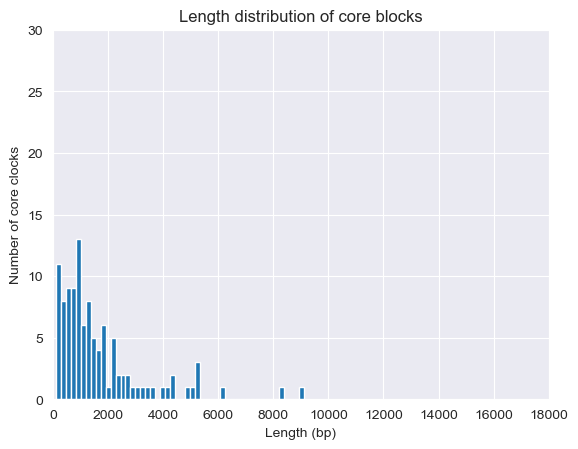

In [21]:
plt.hist(core_df.len,bins=50)
plt.title("Length distribution of core blocks")
plt.xlabel("Length (bp)")
plt.ylabel("Number of core clocks")
plt.xlim((0,18000))
plt.ylim((0,30))
plt.savefig("output/core_block_length_distribution_RAGE.pdf")
plt.show()

## Pangrnome frequency visualisation

In [40]:
nstrain = stats_df.n_strains.to_list()
counts = []
for n in range(1,18):
    counts.append(nstrain.count(n))

print(counts)
print(sum(counts))

[1946, 1429, 448, 362, 215, 161, 142, 133, 162, 108, 96, 105, 149, 111, 189, 135, 309]
6200


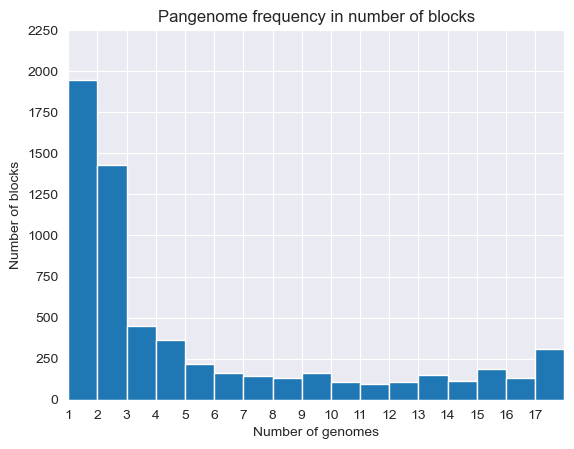

In [34]:
plt.hist(stats_df.n_strains,bins=np.arange(1,19))
plt.title("Pangenome frequency in number of blocks")
plt.xlabel("Number of genomes")
plt.ylabel("Number of blocks")
plt.xlim(1,18)
plt.ylim((0,2250))
plt.xticks(np.arange(1, 18))
plt.savefig("output/block_number_distribution_RAGE.pdf")
plt.show()

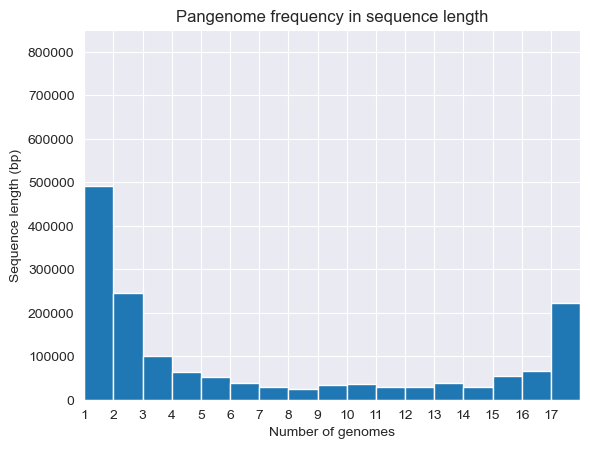

In [37]:
plt.hist(stats_df.n_strains,bins=np.arange(1,19),weights=stats_df.len)
plt.title("Pangenome frequency in sequence length")
plt.xlabel("Number of genomes")
plt.ylabel("Sequence length (bp)")
plt.xlim(1,18)
plt.ylim((0,850000))
plt.xticks(np.arange(1, 18))
plt.savefig("output/block_length_distribution_RAGE.pdf")
plt.show()

## Block presence-absence

In [15]:
bl_count = graph.to_blockcount_df()
print(bl_count)

path_id               Boryong  Gilliam  Ikeda  Karp  Kato  TA686  TA763  TW1  \
block_id                                                                       
150533987538472             0        0      0     0     0      0      0    0   
2578035285160840            0        0      0     0     0      0      0    0   
11666215497195322           1        1      1     0     1      1      0    0   
11870644487091915           0        0      0     0     0      0      0    0   
15265049759976076           0        0      0     0     0      0      0    0   
...                       ...      ...    ...   ...   ...    ...    ...  ...   
18429425207846581478        0        0      0     0     0      1      0    0   
18433310660094588130        0        0      0     1     0      0      0    0   
18433626272488882400        0        0      1     0     1      0      0    1   
18438657053149159841        0        0      1     0     2      0      0    0   
18443476376147542547        0        0  

<Axes: xlabel='block_id', ylabel='path_id'>

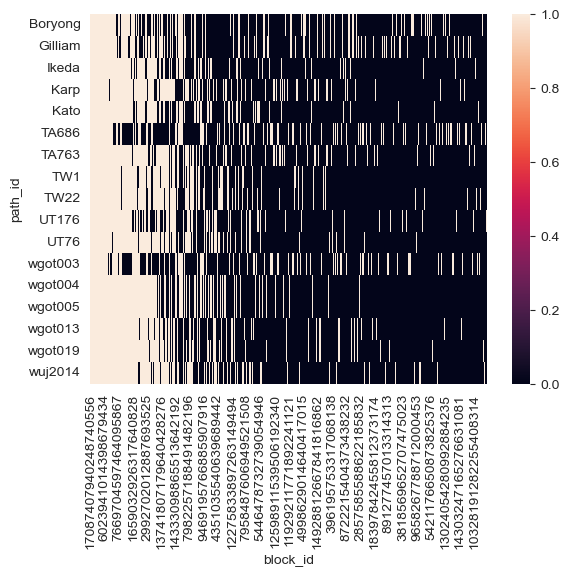

In [16]:
# block presence-absence matrix
block_PA = bl_count > 0
# order blocks by frequency
bl_order = block_PA.sum(axis=1).sort_values(ascending=False).index
# plot presence-absence matrix
sns.heatmap(block_PA.loc[bl_order].T)

## Visualising paths

In [14]:
path_dict = graph.to_path_dictionary()
#print(path_dict)

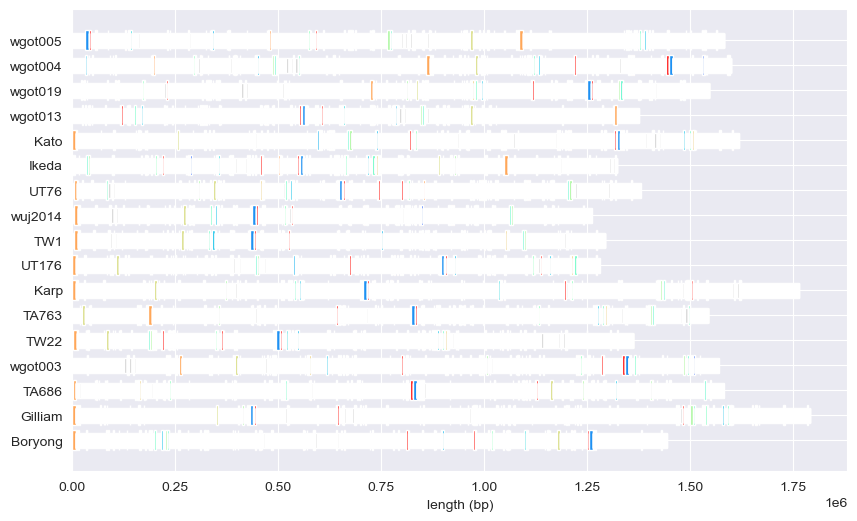

In [15]:
block_stats = graph.to_blockstats_df()
# dictionary to assign a new random color to each block
block_color = defaultdict(lambda: plt.cm.rainbow(np.random.rand()))

fig, ax = plt.subplots(figsize=(10, 6))

y = 0
for path_name, path in path_dict.items():
    x = 0
    for block_id, block_strand in path:

        L = block_stats.loc[block_id, "len"] # block consensus length
        is_core = block_stats.loc[block_id, "core"]

        # block color
        color = block_color[block_id] if is_core else "lightgray"
        block_color[block_id] = mpl.colors.to_hex(color)

        height = 0.8 if is_core else 0.6 # block thickness

        ax.barh(y, L, left=x, height=height, color=color)

        x += L
    y += 1

ax.set_yticks(range(len(path_dict)))
ax.set_yticklabels(path_dict.keys())
ax.set_xlabel("length (bp)")
plt.savefig("output/synteny_RAGE.pdf",format="pdf")
plt.show()


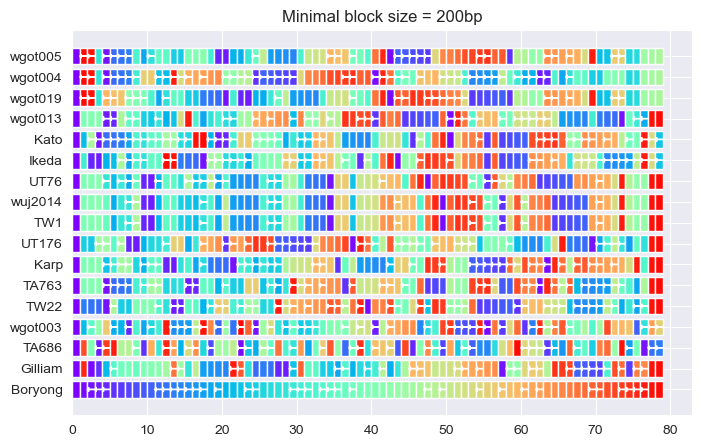

In [16]:
# find MSUs
threshold_len = 200  # minimal length of core blocks to consider
MSU_mergers, MSU_paths, MSU_len = pp.minimal_synteny_units(graph, threshold_len)

# dictionary to assign colors to MSUs
cmap = mpl.colormaps["rainbow"]
color_generator = (cmap(i / len(MSU_len)) for i in range(len(MSU_len)))
colors = defaultdict(lambda: next(color_generator))

fig, ax = plt.subplots(figsize=(8, 5))

for i, (iso, path) in enumerate(MSU_paths.items()):
    for j, node in enumerate(path.nodes):
        ax.barh(i, 1, left=j, color=colors[node.id])
        if not node.strand:
            ax.arrow(j + 1, i, -0.8, 0, head_width=0.2, head_length=0.2)
ax.set_yticks(range(len(MSU_paths)))
ax.set_yticklabels(list(MSU_paths.keys()))
plt.title("Minimal block size = 200bp")
plt.savefig("output/MSU_RAGE_core100_min200.pdf",format="pdf")
plt.show()

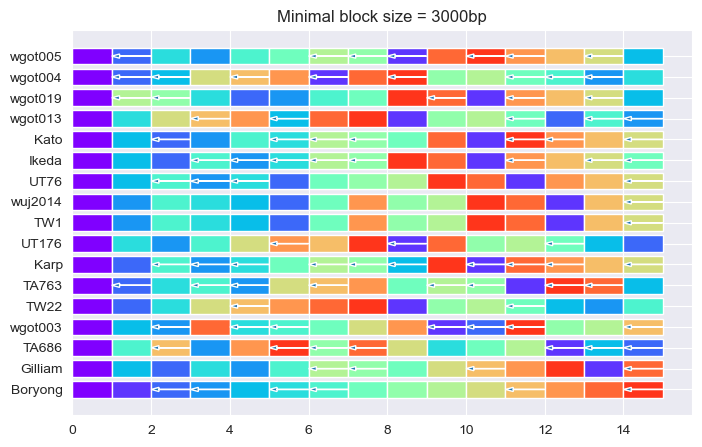

In [17]:
threshold_len = 3000  # minimal length of core blocks to consider
MSU_mergers, MSU_paths, MSU_len = pp.minimal_synteny_units(graph, threshold_len)
# dictionary to assign colors to MSUs
cmap = mpl.colormaps["rainbow"]
color_generator = (cmap(i / len(MSU_len)) for i in range(len(MSU_len)))
colors = defaultdict(lambda: next(color_generator))

fig, ax = plt.subplots(figsize=(8, 5))

for i, (iso, path) in enumerate(MSU_paths.items()):
    for j, node in enumerate(path.nodes):
        ax.barh(i, 1, left=j, color=colors[node.id])
        if not node.strand:
            ax.arrow(j + 1, i, -0.8, 0, head_width=0.2, head_length=0.2)
ax.set_yticks(range(len(MSU_paths)))
ax.set_yticklabels(list(MSU_paths.keys()))
plt.title("Minimal block size = 3000bp")
plt.savefig("output/MSU_RAGE_core100_min3000.pdf",format="pdf")
plt.show()